In [5]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

In [6]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [7]:
df = pd.read_csv("../../../6_Leveled_Datasets/Duplicates/Leveled_Androcrawl (duplicates).csv")

0 >> 5975

1 >> 5560

In [8]:
5975 * 0.3

1792.5

In [9]:
5560 * 0.3

1668.0

In [10]:
Bval = df[df["class"] == 0].sample(n=1792, random_state=42)
Mval = df[df["class"] == 1].sample(n=1668, random_state=42)
validation = pd.concat([Bval,Mval])
indexes = validation["class"].index.tolist()
validation = shuffle(validation)
validation = validation.reset_index()
validation.drop(columns=["index"], inplace=True)
x_validation = validation.drop(columns=["class"])
y_validation = validation["class"]

In [11]:
df.drop(index=indexes, inplace=True)

In [12]:
(5975 - 1792) * 0.8

3346.4

In [13]:
(5560 - 1668) * 0.8

3113.6000000000004

In [14]:
Btrain = df[df["class"] == 0].sample(n=3346, random_state=42)
Mtrain = df[df["class"] == 1].sample(n=3114, random_state=42)
train = pd.concat([Btrain,Mtrain])
indexes = train["class"].index.tolist()
train = shuffle(train)
train = train.reset_index()
train.drop(columns=["index"], inplace=True)
x_train = train.drop(columns=["class"])
y_train = train["class"]

In [15]:
df.drop(index=indexes, inplace=True)

In [16]:
df = shuffle(df)

In [17]:
df = df.reset_index()

In [18]:
df.drop(columns=["index"], inplace=True)

In [19]:
x_test = df.drop(columns=["class"])
y_test = df["class"]

In [20]:
RF = RandomForestClassifier()

In [21]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
print("Curva ROC >> ", roc_auc_score(y_test, RF.predict(x_test))*100, "%")

Curva ROC >>  54.35919998280061 %


### Otimização de Hiperparâmetros

In [24]:
params_grid = {'n_estimators': 1800,
               'min_samples_split': 2,
               'min_samples_leaf': 1,
               'max_features': 'auto',
               'max_depth': 20,
               'bootstrap': False}

In [25]:
ORF = RandomForestClassifier(**params_grid)

In [26]:
ORF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=1800)

In [27]:
print("Curva ROC >> ", roc_auc_score(y_test, ORF.predict(x_test))*100, "%")

Curva ROC >>  54.41609616914368 %


/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

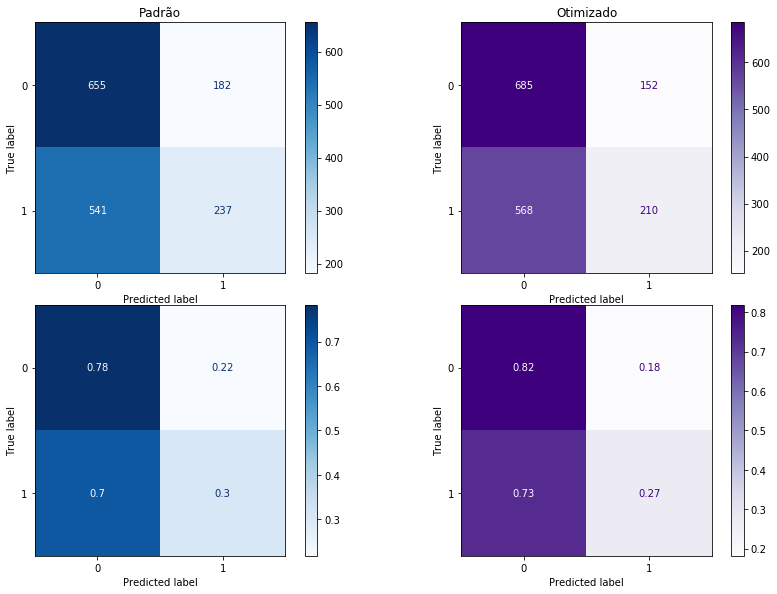

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8))
plt.tight_layout()
ax1.set(title="Padrão")
ax2.set(title="Otimizado")
plot_confusion_matrix(RF, x_test, y_test,ax=ax1, cmap = "Blues", values_format="d")
plot_confusion_matrix(ORF, x_test, y_test, ax=ax2, cmap= "Purples", values_format="d")
plot_confusion_matrix(RF, x_test, y_test,ax=ax3, cmap = "Blues", normalize = "true")
plot_confusion_matrix(ORF, x_test, y_test, ax=ax4, cmap= "Purples", normalize = "true")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=be34dc1b-561d-4c90-bae1-66eed919bb55' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>